In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import urllib
from urllib.request import urlopen

In [59]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [61]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"
### Extracting reviews from Amazon website ################
for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews



### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [62]:
#Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_snapdeal)



In [63]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)



In [64]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")


In [65]:
stop_words = stopwords.words('english')


In [73]:
sw=open('C:/Users/kishore/Downloads/stop.txt','r')

In [75]:
print(sw)
stopwords = sw.read()


<_io.TextIOWrapper name='C:/Users/kishore/Downloads/stop.txt' mode='r' encoding='cp1252'>


In [76]:
stopwords = stopwords.split("\n")


In [77]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]


In [78]:
ip_rev_string = " ".join(ip_reviews_words)


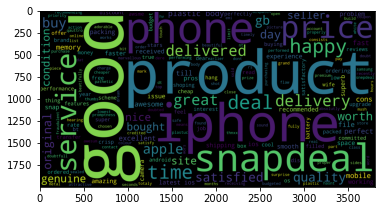

In [80]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=3800,
                      height=2000
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [82]:
# positive words # Choose the path for +ve words stored in system
with open("C:/Users/kishore/Downloads/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[:]


In [83]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/kishore/Downloads/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[:]


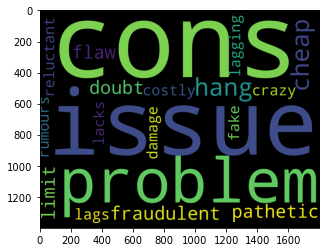

In [84]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)


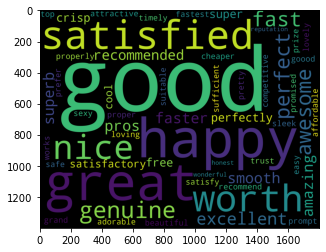

In [85]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)
